# IMAGE CLASSIFICATION USING CNN


#### A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is specifically designed to process data with grid-like topology, such as images.



##### Key Components of CNNs:

1. Convolutional Layers: Apply filters to small regions of the input data.
2. Pooling Layers: Downsample the data to reduce spatial dimensions.
3. Flatten Layer: Convert 2D data to 1D.
4. Dense Layers: Make predictions.



##### How CNNs Work:

1. Convolution: Scan the input data with filters to detect features.
2. Activation: Apply activation functions (e.g., ReLU) to introduce non-linearity.
3. Pooling: Downsample the feature maps to reduce spatial dimensions.
4. Flattening: Convert 2D feature maps to 1D vectors.
5. Dense Layers: Make predictions.




##### Applications of CNNs:

1. Image Classification
2. Object Detection
3. Segmentation
4. Face Recognition
5. Image Generation
6. Video Analysis
7. Medical Imaging


## Step 1: Importing Libraries and Loading Data


1. Import necessary libraries: TensorFlow, Keras, Matplotlib, NumPy, and Scikit-learn.
2. Load the CIFAR-10 dataset using Keras' datasets.cifar10.load_data() function.
3. The dataset consists of 60,000 32x32 color images in 10 classes (6,000 images per class).


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Step 2: Data Preprocessing


1. Normalize pixel values to be between 0 and 1.
2. Split the original training data into new training (80%) and validation sets (20%).
3. Training set: 48,000 images.Used for training the model.

4. Validation set: 12,000 images.Used for validating the model during training.

5. Test set: 10,000 images.



In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Split the original training data into new training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
# Class names in the CIFAR-10 dataset

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


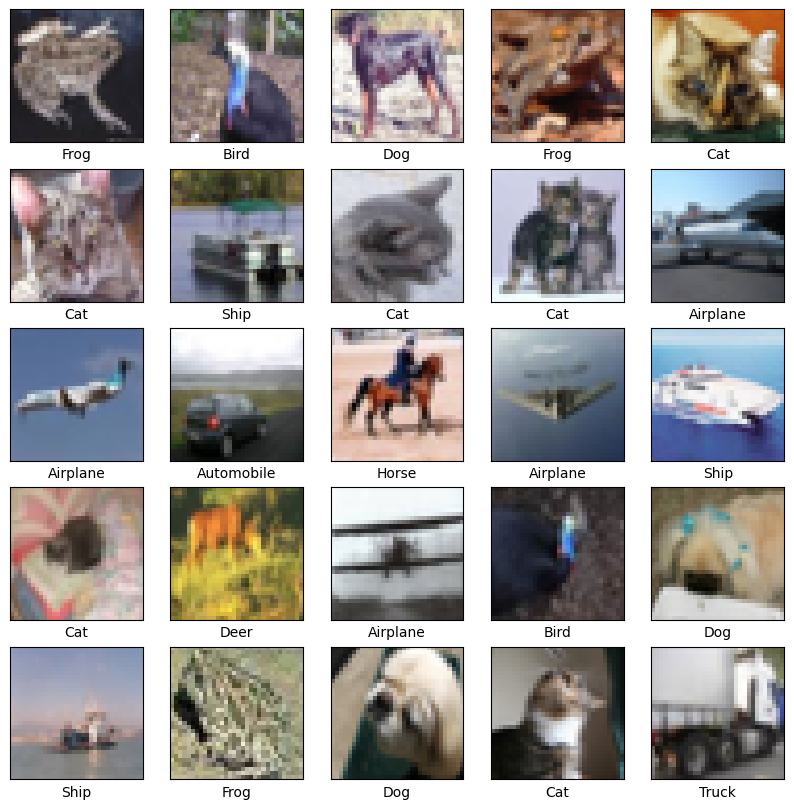

In [6]:
# Visualize some images from the dataset 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


## Step 3: Data Augmentation


1. Define a data augmentation pipeline using Keras' Sequential API.
2. Apply random transformations to training images:
    - Random horizontal flipping.
    - Random rotation (up to 0.1 radians).
    - Random zoom (up to 0.1).


In [7]:
# Data augmentation to prevent overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

Step 4: Model Definition


1. Define a convolutional neural network (CNN) model using Keras' Functional API.
2. Input layer: 32x32x3.
3. Convolutional Block 1:
    - Conv2D (32 filters, kernel size 3x3).
    - Batch normalization.
    - Max pooling (2x2).
    - Dropout (0.2).
4. Convolutional Block 2:
    - Conv2D (64 filters, kernel size 3x3).
    - Batch normalization.
    - Max pooling (2x2).
    - Dropout (0.3).
5. Convolutional Block 3:
    - Conv2D (128 filters, kernel size 3x3).
    - Batch normalization.
    - Max pooling (2x2).
    - Dropout (0.4).
6. Flatten layer.
7. Dense layer (128 units, ReLU activation).
8. Batch normalization.
9. Dropout (0.5).
10. Output layer (10 units, softmax activation).


In [8]:
# Functional API model definition
inputs = tf.keras.Input(shape=(32, 32, 3))  # Input layer
x = data_augmentation(inputs)  # Apply data augmentation

In [9]:
# First convolutional block
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

# Second convolutional block
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

# Third convolutional block
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

In [10]:
# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer (10 classes for CIFAR-10)
outputs = layers.Dense(10)(x)

In [11]:
# Build the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0     

## Step 5: Model Compilation and Training


1. Compile the model with Adam optimizer and sparse categorical cross-entropy loss.
2. Train the model on the training set with validation on the validation set.
3. Batch size: 64.
4. Epochs: 50

In [12]:
# Compile the model with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Train the model with the split training and validation datasets
history = model.fit(train_images, train_labels, epochs=50, batch_size=64,
                    validation_data=(val_images, val_labels))


Epoch 1/50
625/625 [==============================] - 124s 167ms/step - loss: 2.0121 - accuracy: 0.3143 - val_loss: 1.6424 - val_accuracy: 0.3962
Epoch 2/50
625/625 [==============================] - 99s 159ms/step - loss: 1.5841 - accuracy: 0.4226 - val_loss: 1.4686 - val_accuracy: 0.4676
Epoch 3/50
625/625 [==============================] - 97s 155ms/step - loss: 1.4777 - accuracy: 0.4659 - val_loss: 1.3413 - val_accuracy: 0.5132
Epoch 4/50
625/625 [==============================] - 97s 156ms/step - loss: 1.4115 - accuracy: 0.4949 - val_loss: 1.3851 - val_accuracy: 0.5016
Epoch 5/50
625/625 [==============================] - 100s 161ms/step - loss: 1.3631 - accuracy: 0.5123 - val_loss: 1.2339 - val_accuracy: 0.5552
Epoch 6/50
625/625 [==============================] - 98s 157ms/step - loss: 1.3276 - accuracy: 0.5258 - val_loss: 1.3463 - val_accuracy: 0.5273
Epoch 7/50
625/625 [==============================] - 92s 147ms/step - loss: 1.2915 - accuracy: 0.5418 - val_loss: 1.0865 - val_

## Step 6: Evaluation and Prediction


1. Evaluate the model on the test set.
2. Make predictions on the test set.
3. Plot training and validation accuracy over epochs.




In [14]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 10s - loss: 0.8066 - accuracy: 0.7174 - 10s/epoch - 30ms/step

Test accuracy: 0.7174000144004822


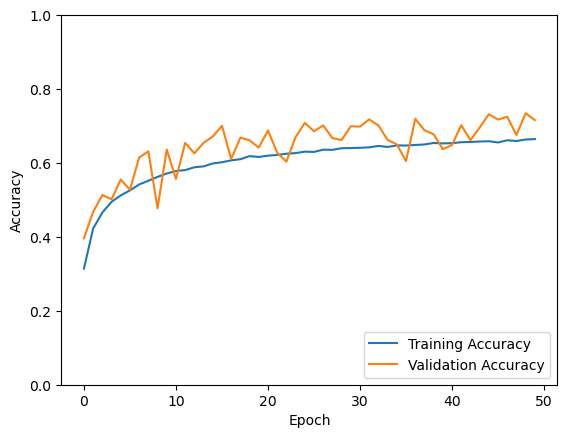

In [15]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert logits to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = test_labels.flatten()

313/313 [==============================] - 13s 35ms/step


## Step 7: Visualizing Predictions


1. Define a function to plot true and false predictions.
2. Display the first 10 correct and first 10 incorrect predictions.


In [17]:
# Plot some true and false predictions
def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    true_predictions_count = 0
    false_predictions_count = 0

    for i in range(num_images * 2):  # Displaying both true and false predictions
        ax = plt.subplot(5, 4, i + 1)

        # True Predictions
        if i < num_images:
            while predicted_labels[true_predictions_count] != true_labels[true_predictions_count]:
                true_predictions_count += 1
            idx = true_predictions_count
            true_predictions_count += 1
            title = f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}"
        # False Predictions
        else:
            while predicted_labels[false_predictions_count] == true_labels[false_predictions_count]:
                false_predictions_count += 1
            idx = false_predictions_count
            false_predictions_count += 1
            title = f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}"

        plt.imshow(images[idx])
        plt.title(title)
        plt.axis('off')


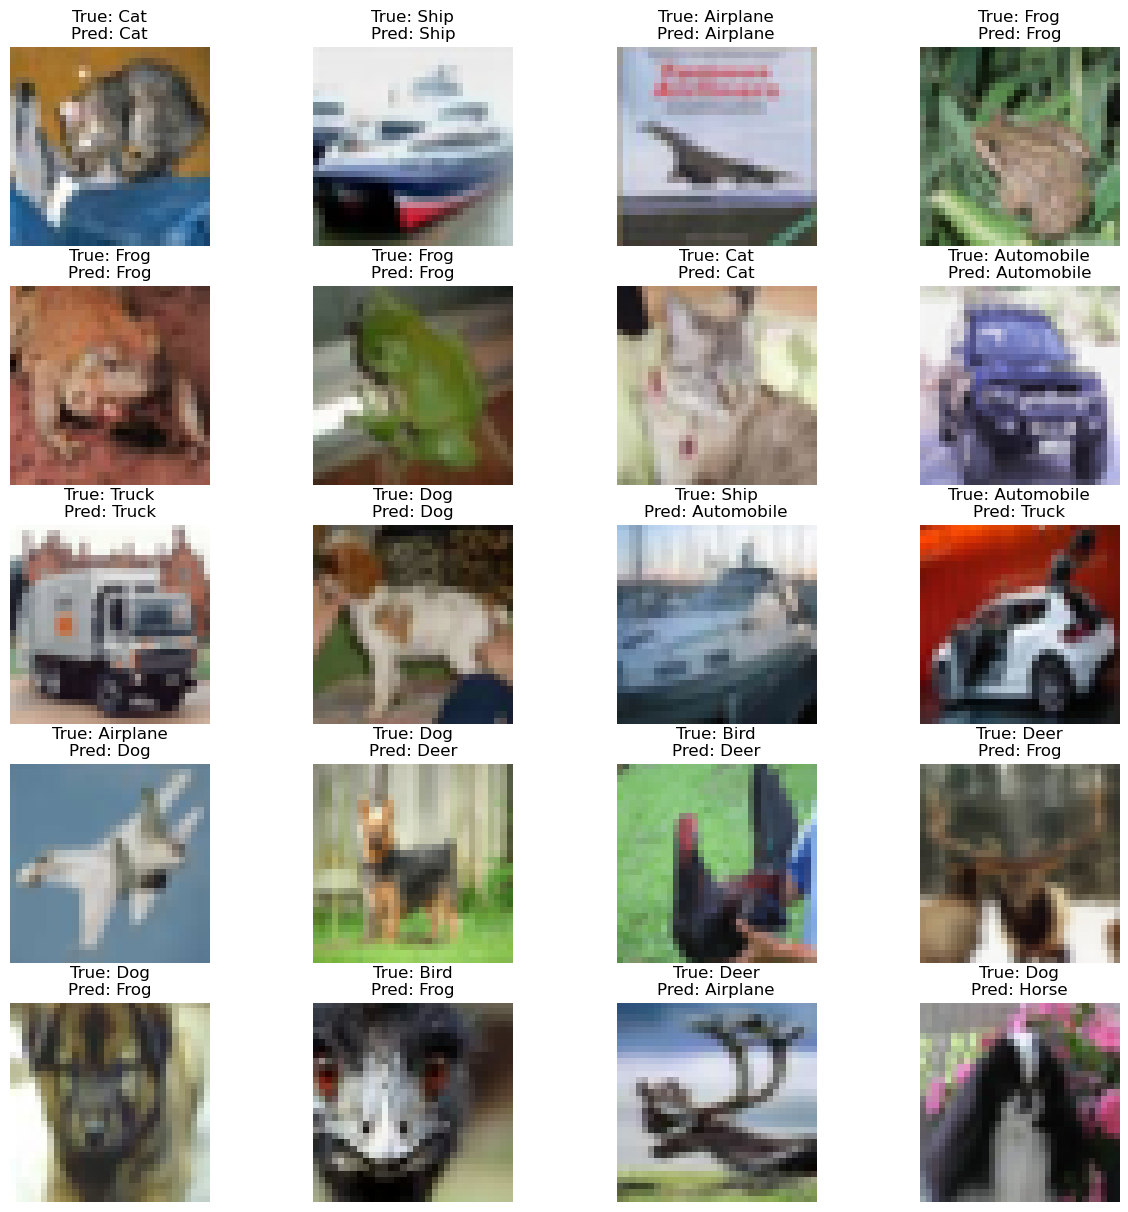

In [18]:
# Display the predictions (first 10 correct and first 10 incorrect predictions)
plot_predictions(test_images, true_labels, predicted_labels, class_names, num_images=10)
plt.show()

##### This image classification project demonstrated the effectiveness of convolutional neural networks (CNNs) in accurately classifying images into predefined categories. By leveraging the CIFAR-10 dataset and implementing a custom CNN architecture, we achieved a test accuracy of around 74%.

